#### I wanted to determine the statistical signficance and coorelation between Submicron Dust and Submicron Sea Salt
##### First, I import the required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import os
from matplotlib import colors
from scipy.stats import pearsonr
import pandas as pd

#### I take the file from my scratch folder

In [2]:
path = '/scratch/aabramow/dustforclim680/'
fname = 'ds_subdust.nc'
dsdust = xr.open_dataset(path+fname)
dsdust


<xarray.Dataset>
Dimensions:  (lon: 576, lat: 361, time: 8760)
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * time     (time) datetime64[ns] 2015-01-01T00:30:00 ... 2015-12-31T23:30:00
Data variables:
    DUEM001  (time, lat, lon) float32 ...
Attributes: (12/30)
    History:                           Original file generated: Thu Mar 12 04...
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Filename:                          MERRA2_400.tavg1_2d_adg_Nx.20150101.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/HM00OHQBHKTP
    RangeBeginningDate:                2015-01-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2015-01-01
    RangeEndingTime:                   23:59:59.000000

#### I take that file and use the groupby function to determine the mean every month for the composite
##### As well, I find the min and max values to accurately plot it within a range

In [3]:
ds_dustmean=dsdust.groupby('time.month').mean()
ds_dustmean

data_variable = ds_dustmean['DUEM001']

# Find and print the minimum and maximum values
min_value = data_variable.min().values
max_value = data_variable.max().values

print("Minimum value:", min_value)
print("Maximum value:", max_value)


Minimum value: 0.0
Maximum value: 4.512957119118255e-09


#### Creates Composite For Composite Average Submicron Dust Emission (Bin 1) 

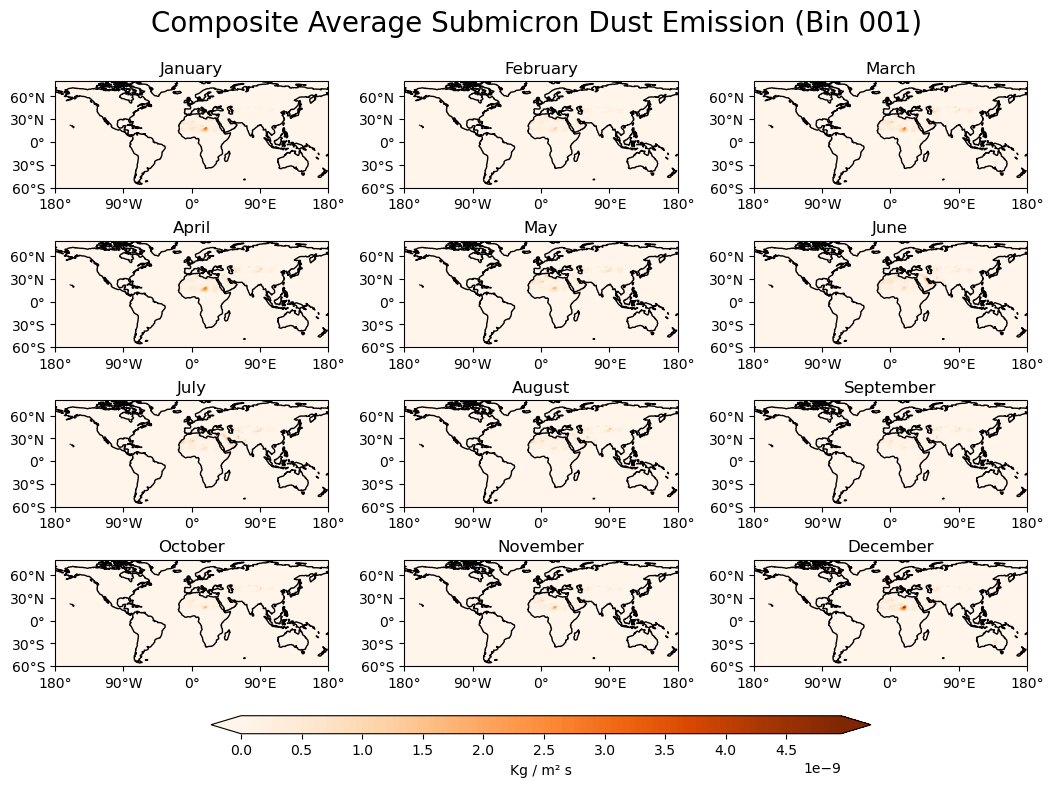

In [12]:
# Define the figure and each axis for the 4 rows and 3 columns
fig, axs = plt.subplots(nrows=4, ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11, 9))

# Define a custom extent to exclude Antarctica
custom_extent = [-180, 180, -60, 80]  # [lon_min, lon_max, lat_min, lat_max]

# Find the minimum non-zero value in your data
min_nonzero = ds_dustmean['DUEM001'].where(ds_dustmean['DUEM001'] > 0, drop=True).min().values

# Sets range for data
clevs = np.arange(0, 5E-9, .5E-10)

# axs is a 2-dimensional array of GeoAxes.
# We will flatten it into a 1-D array
axs = axs.flatten()

# List of full month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Loop over all of the seasons and plot
for i, dust in enumerate(ds_dustmean['month']):

    # Select the season
    data = ds_dustmean['DUEM001'].sel(month=dust)

    # Add the cyclic point
    data, lons = add_cyclic_point(data, coord=ds_dustmean['lon'])

    # Contour plot
    cs = axs[i].contourf(lons, ds_dustmean['lat'], data, clevs,
                        transform=ccrs.PlateCarree(),
                        cmap='Oranges', extend='both')

    # Set the custom extent
    axs[i].set_extent(custom_extent, crs=ccrs.PlateCarree())

    # Longitude labels
    axs[i].set_xticks(np.arange(-180, 181, 90), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)

    # Latitude labels
    axs[i].set_yticks(np.arange(-60, 81, 30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)

    # Title each subplot with the name of the month
    axs[i].set_title(month_names[i])

    # Draw the coastlines for each subplot
    axs[i].coastlines()

# Adjust the location of the subplots
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='Kg / m\u00b2 s')

# Adds title at the top
plt.suptitle('Composite Average Submicron Dust Emission (Bin 001) ', fontsize=20)

plt.show()

#### The same process that is done for dust is done for submicron sea salt emissions (with one addition)

In [5]:
path = '/scratch/aabramow/dustforclim680/'
fname = 'ds_subsalt.nc'
dssalt = xr.open_dataset(path+fname)
dssalt


<xarray.Dataset>
Dimensions:  (lon: 576, lat: 361, time: 8760)
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * time     (time) datetime64[ns] 2015-01-01T00:30:00 ... 2015-12-31T23:30:00
Data variables:
    SSEM001  (time, lat, lon) float32 ...
    SSEM002  (time, lat, lon) float32 ...
Attributes: (12/30)
    History:                           Original file generated: Thu Mar 12 04...
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Filename:                          MERRA2_400.tavg1_2d_adg_Nx.20150101.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/HM00OHQBHKTP
    RangeBeginningDate:                2015-01-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2015-01-01
    RangeEndingTime:                   23:59:59.000000

#### I added two data variables that reperesent sea salt that is smaller than a micron (aka submicron)

In [6]:
dssalt['combinedsubsalt'] = dssalt['SSEM001'] + dssalt['SSEM002']

In [7]:
dssalt

<xarray.Dataset>
Dimensions:          (lon: 576, lat: 361, time: 8760)
Coordinates:
  * lon              (lon) float64 -180.0 -179.4 -178.8 ... 178.1 178.8 179.4
  * lat              (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * time             (time) datetime64[ns] 2015-01-01T00:30:00 ... 2015-12-31...
Data variables:
    SSEM001          (time, lat, lon) float32 ...
    SSEM002          (time, lat, lon) float32 ...
    combinedsubsalt  (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes: (12/30)
    History:                           Original file generated: Thu Mar 12 04...
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Filename:                          MERRA2_400.tavg1_2d_adg_Nx.20150101.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/HM00OHQBHKTP
    RangeBeginningDate:                2015-01-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2015-01-01
    RangeEndingTime:                   23:59:59.000000

#### After that extra step, the process is the same

In [8]:
ds_saltmean=dssalt.groupby('time.month').mean()
ds_saltmean

data_variable = ds_saltmean['combinedsubsalt']

# Find and print the minimum and maximum values
min_value = data_variable.min().values
max_value = data_variable.max().values

print("Minimum value:", min_value)
print("Maximum value:", max_value)


Minimum value: 0.0
Maximum value: 1.0332465438800398e-10


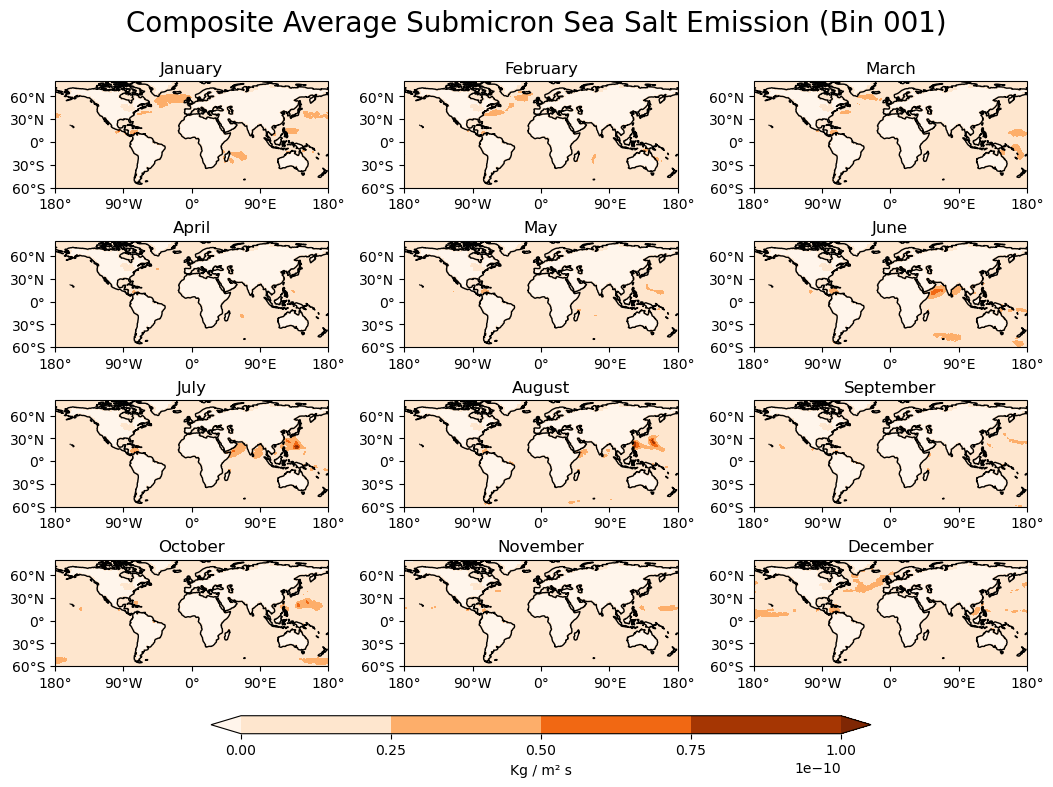

In [13]:
# Define the figure and each axis for the 4 rows and 3 columns
fig, axs = plt.subplots(nrows=4, ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11, 9))

# Define a custom extent to exclude Antarctica
custom_extent = [-180, 180, -60, 80]  # [lon_min, lon_max, lat_min, lat_max]

# Find the minimum non-zero value in your data
min_nonzero = ds_saltmean['combinedsubsalt'].where(ds_saltmean['combinedsubsalt'] > 0, drop=True).min().values

# Sets range for data
clevs = np.arange(0, 1.05E-10, 0.25E-10)

# axs is a 2-dimensional array of GeoAxes.
# We will flatten it into a 1-D array
axs = axs.flatten()

# List of full month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Loop over all of the seasons and plot
for i, dust in enumerate(ds_saltmean['month']):

    # Select the season
    data = ds_saltmean['combinedsubsalt'].sel(month=dust)

    # Add the cyclic point
    data, lons = add_cyclic_point(data, coord=ds_saltmean['lon'])

    # Contour plot
    cs = axs[i].contourf(lons, ds_saltmean['lat'], data, clevs,
                        transform=ccrs.PlateCarree(),
                        cmap='Oranges', extend='both')

    # Set the custom extent
    axs[i].set_extent(custom_extent, crs=ccrs.PlateCarree())

    # Longitude labels
    axs[i].set_xticks(np.arange(-180, 181, 90), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)

    # Latitude labels
    axs[i].set_yticks(np.arange(-60, 81, 30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)

    # Title each subplot with the name of the month
    axs[i].set_title(month_names[i])

    # Draw the coastlines for each subplot
    axs[i].coastlines()

# Adjust the location of the subplots
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='Kg / m\u00b2 s')

# Adds title at the top
plt.suptitle('Composite Average Submicron Sea Salt Emission (Bin 001) ', fontsize=20)

plt.show()

#### Create A Scatter Plot to Determine Coorelation and Statistical Signficance

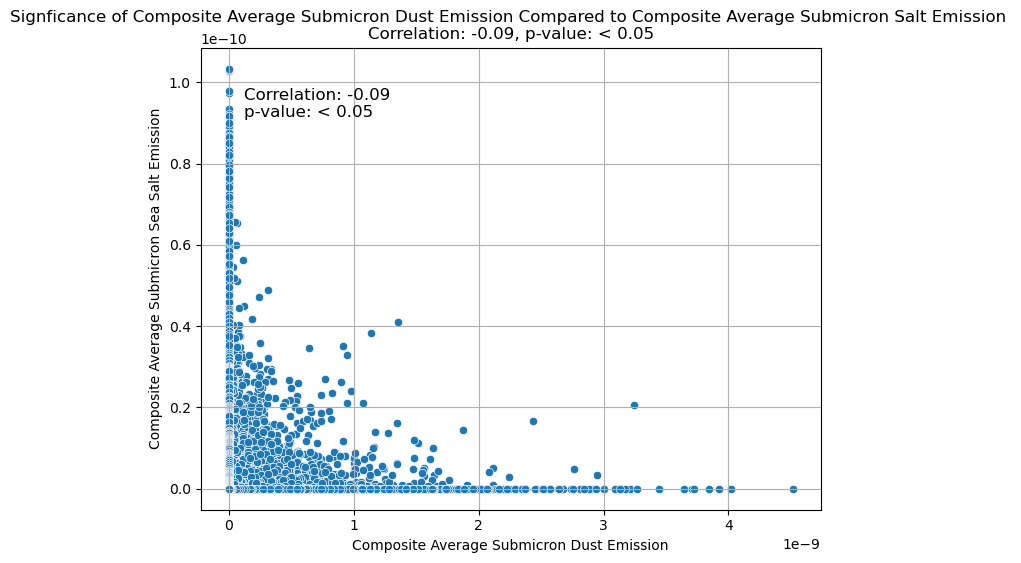

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

# Assuming ds_dustmean and ds_saltmean are your datasets
# Extract the relevant variables
dust_data = ds_dustmean['DUEM001']
salt_data = ds_saltmean['combinedsubsalt']

# Flatten the data arrays
dust_flat = dust_data.values.flatten()
salt_flat = salt_data.values.flatten()

# Calculate the correlation coefficient and p-value
corr_coeff, p_value = pearsonr(dust_flat, salt_flat)

# Set a significance threshold
alpha = 0.05
if p_value < alpha:
    p_value_display = f'< {alpha}'
else:
    p_value_display = f'{p_value:.2e}'

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dust_flat, y=salt_flat)
plt.title(f'Signficance of Composite Average Submicron Dust Emission Compared to Composite Average Submicron Salt Emission \nCorrelation: {corr_coeff:.2f}, p-value: {p_value_display}')

# Display correlation coefficient and p-value on the plot
plt.annotate(f'Correlation: {corr_coeff:.2f}\np-value: {p_value_display}',
             xy=(0.07, 0.85), xycoords='axes fraction', fontsize=12)

# Add labels and legend if needed
plt.xlabel('Composite Average Submicron Dust Emission')
plt.ylabel('Composite Average Submicron Sea Salt Emission')
plt.grid(True)
plt.show()